In this file we will expolore our dataset from"Employers" of Drexel students answering the question "What are the student's strengths?"

In [1]:
#Importing necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

In [2]:
# Importing datasets
df=pd.read_csv('/Users/otabekjuraev/OneDrive - Sejong University/DREXEL/Courses/MIS/Week 3/dataset/employer_weakness.csv') 
print("Employer => Weakness",df.shape)

Employer => Weakness (728, 10)


In [ ]:
# So we have 728 rows and 10 columns in our dataset.

In [ ]:
# Print first 10 rows of data

In [4]:
df.shape
df.isnull().sum()

Respondent ID                                                 0
Terms                                                         0
Class (BOT)                                                   0
College Code                                                  0
Major Code                                                    0
Conc                                                          0
Major Conc                                                  716
Co-op #                                                       0
Citizenship Status                                            0
What are the student's weaknesses/areas for improvement?     20
dtype: int64

In [5]:
# We have 716 missing values in "Major Conc" column, since don't neet this data we delete it from our dataframe.

df.isnull().sum()
df = df.drop("Major Conc", axis=1)

# Delete rows with missing values

In [6]:
df = df.dropna(subset=["What are the student's weaknesses/areas for improvement?"])

In [7]:
# This how our target text data looks like. 708 rows of valid data left
df

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Co-op #,Citizenship Status,What are the student's weaknesses/areas for improvement?
0,6,201435-201445,SR,B,ACCT,4COP,Only,US Citizen,In the time that I worked with [Student] - the...
1,11,201415-201425,JR,B,FIN,4COP,Only,US Citizen,Improvement needed in areas of following proto...
2,25,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,Opportunity exists for [Student] to know his a...
3,37,201435-201445,SR,B,LGST,5COP,Second,US Citizen,Communicating issues in a simple concise manne...
4,44,201435-201445,SO,B,BAE,5COP,First,US Citizen,late on occasion
...,...,...,...,...,...,...,...,...,...
723,5918,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,He needs to come on time for meetings and incr...
724,5920,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,[Student] agreed she needs to work on time man...
725,5921,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,This is not a weakness but a learning process ...
726,5932,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,[Student's] areas for improvement are to take ...


In [8]:
#check for missiing values
df.isnull().sum()

Respondent ID                                               0
Terms                                                       0
Class (BOT)                                                 0
College Code                                                0
Major Code                                                  0
Conc                                                        0
Co-op #                                                     0
Citizenship Status                                          0
What are the student's weaknesses/areas for improvement?    0
dtype: int64

In [9]:
# No missing values in our dataset

# Working on removing contraction words

Before removing all punctuation we will convert contractions into whole words not to lose some information.

"Contractions are a unique type of word that combines two or more other words in a shortened form, 
usually with an apostrophe. Contractions take words that usually go together, 
like can not or I have, and then remove certain letters to shorten them and make other words, like can’t or I’ve." (Source: https://www.grammarly.com/blog/contractions/)

It is useful to keep those word in order to keep sentiment of the sentences.

In [10]:
import contractions

In [11]:
contractions_re=re.compile('(%s)' % '|'.join(contractions.contractions_dict.keys()))

In [12]:
contractions.contractions_dict.keys()

dict_keys(["I'm", "I'm'a", "I'm'o", "I've", "I'll", "I'll've", "I'd", "I'd've", 'Whatcha', "amn't", "ain't", "aren't", "'cause", "can't", "can't've", "could've", "couldn't", "couldn't've", "daren't", "daresn't", "dasn't", "didn't", 'didn’t', "don't", 'don’t', "doesn't", "e'er", "everyone's", 'finna', 'gimme', "gon't", 'gonna', 'gotta', "hadn't", "hadn't've", "hasn't", "haven't", "he've", "he's", "he'll", "he'll've", "he'd", "he'd've", "here's", "how're", "how'd", "how'd'y", "how's", "how'll", "isn't", "it's", "'tis", "'twas", "it'll", "it'll've", "it'd", "it'd've", 'kinda', "let's", 'luv', "ma'am", "may've", "mayn't", "might've", "mightn't", "mightn't've", "must've", "mustn't", "mustn't've", "needn't", "needn't've", "ne'er", "o'", "o'clock", "ol'", "oughtn't", "oughtn't've", "o'er", "shan't", "sha'n't", "shalln't", "shan't've", "she's", "she'll", "she'd", "she'd've", "should've", "shouldn't", "shouldn't've", "so've", "so's", "somebody's", "someone's", "something's", 'sux', "that're", "

In [13]:
dt = contractions.contractions_dict
def update_text(text):
    for key in dt:
        text = re.sub(key, dt[key], text)
    return text

In [14]:
def expand_contractions(text,contractions_dict=contractions.contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [20]:
df["processed"] = df["What are the student's weaknesses/areas for improvement?"].apply(lambda x: update_text(x))
df.sample(10)

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Co-op #,Citizenship Status,What are the student's weaknesses/areas for improvement?,processed
618,5065,201415-201425,PJ,B,BAE,5COP,Second,US Citizen,[Student] had no weaknesses to speak about.,[Student] had no weaknesses to speak about.
493,4001,201415-201425,JR,B,MKTG,5COP,Third,US Citizen,[Student] had very few weaknesses as she start...,[Student] had very few weaknesses as she start...
680,5597,201435-201445,JR,B,BAE,5COP,Second,US Citizen,[Student] seemed to get distracted easily ther...,[Student] sethemed to get distracted easily th...
67,816,201415-201425,PJ,B,ENTR,5COP,First,US Citizen,1. Keep acquiring knowledge of general constru...,1. Keep acquiring knowledge of general constru...
365,3207,201415-201425,SO,B,GBUS,5COP,First,US Citizen,Punctuality/ time management.\r\nProjects seem...,Punctuality/ time managthement.\r\nProjects se...
132,1478,201435-201445,PJ,B,ACCT,5COP,First,US Citizen,It's difficult to comment on [Student's] weakn...,It's difficult to comment on [Student's] weakn...
47,571,201435-201445,PJ,B,MIS,5COP,First,US Citizen,Possibly taking the initiative to find somethi...,Possibly taking the initiative to find somethi...
602,4925,201415-201425,JR,B,MKTG,5COP,Third,US Citizen,- Attention to detail/following instructions\r...,- Attention to detail/following instructions\r...
130,1389,201435-201445,PJ,B,FIN,5COP,First,US Citizen,There is not much that needs improvement. If ...,There is not much that needs improvthement. I...
213,2102,201435-201445,SR,B,ACCT,4COP,Only,Non US Citizen,[Student] struggles sometimes with his communi...,[Student] struggles sometimes with his communi...


# Lowercase the text

In [21]:
df['processed']=df["processed"].apply(lambda x: x.lower())

In [22]:
df["processed"]

0      in the time that i worked with [student] - the...
1      improvthement needed in areas of following pro...
2      opportunity exists for [student] to know his a...
3      communicating issues in a simple concise manne...
4                                       late on occasion
                             ...                        
723    he needs to come on time for meetings and incr...
724    [student] agreed she needs to work on time man...
725    this is not a weakness but a learning process ...
726    [student's] areas for improvthement are to tak...
727    at times there is a language issue and communi...
Name: processed, Length: 708, dtype: object

# Remove all digits

In [25]:
df['processed']=df['processed'].apply(lambda x: re.sub('\w*\d\w*','', str(x)))

# Removing punctuations

In [28]:
df['processed'] = df['processed'].apply(lambda i: re.sub('[%s]' % re.escape(string.punctuation), '', str(i)))

In [29]:
#Checking the results
df.head(10)

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Co-op #,Citizenship Status,What are the student's weaknesses/areas for improvement?,processed
0,6.0,201435-201445,SR,B,ACCT,4COP,Only,US Citizen,In the time that I worked with [Student] - the...,in the time that i worked with student the on...
1,11.0,201415-201425,JR,B,FIN,4COP,Only,US Citizen,Improvement needed in areas of following proto...,improvthement needed in areas of following pro...
2,25.0,201435-201445,JR,B,GBUS,4COP,Only,US Citizen,Opportunity exists for [Student] to know his a...,opportunity exists for student to know his aud...
3,37.0,201435-201445,SR,B,LGST,5COP,Second,US Citizen,Communicating issues in a simple concise manne...,communicating issues in a simple concise manne...
4,44.0,201435-201445,SO,B,BAE,5COP,First,US Citizen,late on occasion,late on occasion
5,60.0,201415-201415,JR,B,BAE,5COP,Second,Non US Citizen,I couldn't find his weakness.,i could not find his weakness
6,71.0,201435-201445,SR,B,INT1,5COP,Second,US Citizen,[Student] is a go-getter and has a lot of pote...,student is a gogetter and has a lot of potenti...
7,81.0,201435-201445,SR,B,MKTG,5COP,Second,US Citizen,"Very confident, almost a little over confident...",very confident almost a little over confident ...
8,92.0,201435-201445,JR,B,MIS,5COP,First,US Citizen,Don't be afraid to interact with any of the st...,dont be afraid to interact with any of the staff
9,101.0,201415-201425,SR,B,MKTG,4COP,Only,US Citizen,[Student] would benefit from becoming more con...,student would benefit from becoming more confi...


# Removing extra spaces between words

In [30]:
df.loc['processed']=df['processed'].apply(lambda i: re.sub(' +',' ',i))

In [31]:
df["processed"]

0            in the time that i worked with student  the on...
1            improvthement needed in areas of following pro...
2            opportunity exists for student to know his aud...
3            communicating issues in a simple concise manne...
4                                             late on occasion
                                   ...                        
724          student agreed she needs to work on time manag...
725          this is not a weakness but a learning process ...
726          students areas for improvthement are to take i...
727          at times there is a language issue and communi...
processed                                                  nan
Name: processed, Length: 709, dtype: object

# Removing Stop words

In [33]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [35]:
txt = df['processed'].values[0]
i =0
for token in list(nlp(txt)):
    print(i+1,":", token, token.is_stop, token.lemma_)
    i = i+1
#checking the results

1 : in True in
2 : the True the
3 : time False time
4 : that True that
5 : i True I
6 : worked False work
7 : with True with
8 : student False student
9 :   False  
10 : the True the
11 : only True only
12 : improvthement False improvthement
13 : that True that
14 : i True I
15 : would True would
16 : suggest False suggest
17 : that True that
18 : he True he
19 : could True could
20 : work False work
21 : on True on
22 : would True would
23 : be True be
24 : to True to
25 : not True not
26 : second False second
27 : guess False guess
28 : himself True himself
29 :   False  
30 : i True I
31 : think False think
32 : we True we
33 : all True all
34 : tend False tend
35 : to True to
36 : do True do
37 : this True this
38 : so True so
39 : this True this
40 : is True be
41 : the True the
42 : only True only
43 : thing False thing
44 : i True I
45 : would True would
46 : suggest False suggest


#  Lemmitazation 
# Removing stop words  
# Correcting misspelled words

In [36]:
from textblob import TextBlob
def rem_stop_words_lemmatizing(txt):
    ans = []
    for token in nlp(txt):
        # Cheking and removing stop words
        if not token.is_stop:
            # This part lemmatizes words, checks misspelled words and corrects them
            ans.append(str(TextBlob(token.lemma_).correct()))
    return " ".join([word for word in ans])

In [37]:
# df['lemmatized']=df['processed'].apply(lambda i: ' '.join([token.lemma_ for token in list(nlp(i)) if (token.is_stop==False)]))
df['lemmatized'] = df['processed'].apply(lambda x: rem_stop_words_lemmatizing(x))
df.sample(10)

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Co-op #,Citizenship Status,What are the student's weaknesses/areas for improvement?,processed,lemmatized
486,3933.0,201415-201425,JR,B,FIN,5COP,Third,US Citizen,"He could work on ""attention to detail"" a bit. ...",he could work on attention to detail a bit in ...,work attention detail bit office manymost atte...
157,1654.0,201435-201445,SR,B,MKTG,5COP,Second,US Citizen,No real weaknesses - skills like copywriting w...,no real weaknesses skills like copywriting wi...,real weakness skill like copywrite continue ...
540,4399.0,201415-201425,PJ,B,FIN,5COP,Third,US Citizen,"I encourage Jawaad to ""take the next step"" and...",i encourage jawaad to take the next step and l...,encourage award step look exist process improv...
34,372.0,201435-201445,JR,B,BAE,5COP,Second,US Citizen,"Unfortunately, as a result of [Student's] sign...",unfortunately as a result of students signific...,unfortunately result student significant absen...
644,5286.0,201435-201445,SR,B,ACCT,5COP,Third,US Citizen,Tax technical growth which is gained with more...,tax technical growth which is gained with more...,tax technical growth gain experience project
234,2268.0,201435-201445,PJ,B,BAE,5COP,First,US Citizen,Through [Student's] time at [Employer] I watch...,through students time at employer i watched he...,student time employer watch communication skil...
387,3356.0,201435-201445,JR,B,LGST,5COP,First,US Citizen,[Employer] had to terminate the co-op before t...,employer had to terminate the coop before the ...,employer terminate cook end date show fail c...
135,1494.0,201435-201445,JR,B,FIN,5COP,Second,US Citizen,One area that [Student] can continue to improv...,one area that student can continue to improve ...,area student continue improve ability initiati...
131,1452.0,201435-201445,JR,B,ACCT,5COP,First,US Citizen,[Student] should work on prioritzing skills re...,student should work on prioritzing skills rela...,student work priority skill relate project in ...
167,1747.0,201435-201445,PJ,B,MKTG,5COP,First,US Citizen,An area for improvement is being able to compl...,an area for improvthement is being able to com...,area improvement able complete task training k...


In [38]:
# Chercking results
print("Edited >>:", df.loc[478, "lemmatized"])
print("Unedited >>:", df.loc[478, "processed"])


Edited >>: student internship supervisor see area weakness   able communicate team dependable task assign
Unedited >>: during students internship as her supervisor i am not seeing any areas that show her weaknesses  she was able to communicate well with the team and was dependable on the tasks that were assigned to her


# Vectorize preprocessed data

In [45]:
# Here we will create Words frequency matrix 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (2,2))
data_new=cv.fit_transform(df["lemmatized"])
data_new.shape
df_dtm = pd.DataFrame(data_new.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df.index
df_dtm.head(3)

,ability boil,ability clinically,ability communicate,ability communication,ability complete,ability continue,ability control,ability decembersion,ability excellent,ability inability,...,young career,young college,young eager,young learn,young man,young people,young professional,young student,zeal passion,zone believe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize data

## Word Cloud

In [46]:
from wordcloud import WordCloud
from textwrap import wrap

In [47]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

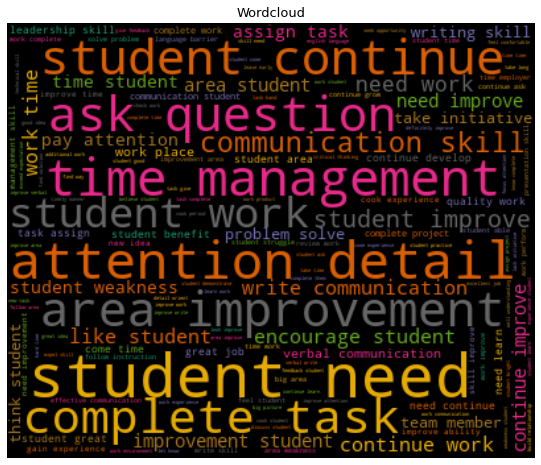

In [48]:
generate_wordcloud(data = df_dtm.sum(axis=0).to_dict(), title = "Wordcloud")

In [59]:
word_freqs = df_dtm.sum(axis=0).sort_values(ascending=False)[:15].to_dict()
word_freqs

{'student need': 57,
 'attention detail': 47,
 'time management': 44,
 'ask question': 41,
 'area improvement': 40,
 'student continue': 39,
 'complete task': 36,
 'student work': 34,
 'communication skill': 28,
 'student improve': 27,
 'need work': 21,
 'continue work': 18,
 'encourage student': 17,
 'like student': 16,
 'write communication': 16}

# Word frequency

In [60]:
import matplotlib.pyplot as plt

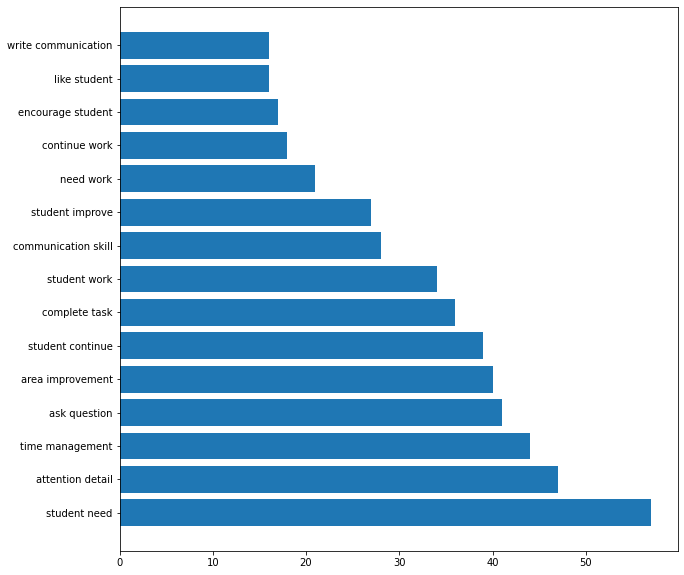

In [61]:
plt.figure(figsize = (10, 10))
plt.barh(range(len(word_freqs)), word_freqs.values())
plt.yticks(range(len(word_freqs)), word_freqs.keys())
plt.yticks(rotation = 0)
plt.show()